In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-restaurants-rating-dataset/zomato.csv
/kaggle/input/zomato-restaurants-rating-dataset/Country-Code.csv


In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot
%matplotlib inline
import seaborn as sns

python libraries that will help in performing EDA

Data is encoded in latin-1 so to read data we need to apply encodng of latin-1 to it

In [3]:
df=pd.read_csv('../input/zomato-restaurants-rating-dataset/zomato.csv',encoding="latin-1")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


**Checking Null values in dataset**

In [4]:
nan_values=df.isna()
nan_columns=nan_values.any()
nan_columns

Restaurant ID           False
Restaurant Name         False
Country Code            False
City                    False
Address                 False
Locality                False
Locality Verbose        False
Longitude               False
Latitude                False
Cuisines                 True
Average Cost for two    False
Currency                False
Has Table booking       False
Has Online delivery     False
Is delivering now       False
Switch to order menu    False
Price range             False
Aggregate rating        False
Rating color            False
Rating text             False
Votes                   False
dtype: bool

so here we know that only cuisines column has null values

In [5]:
df1=pd.read_csv("../input/zomato-restaurants-rating-dataset/Country-Code.csv")
print(df1.head())
len(df1.index)

   Country Code    Country
0             1      India
1            14  Australia
2            30     Brazil
3            37     Canada
4            94  Indonesia


15

so we have data of 15 countries with their country codes. to ease the process of EDA, merging both the dataset 


In [6]:
df2=pd.merge(df,df1,on="Country Code",how="left")
df2.head(2)
# so we added df1 in df in a new dataframe df2 in left merging

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


**REGIONAL ANALYSIS**

In [7]:
print("List of countries in data set: ")
for x in pd.unique(df2.Country):
    print(x)
print("Total number of countries in dataset: ",len(pd.unique(df2.Country)))

List of countries in data set: 
Phillipines
Brazil
United States
Australia
Canada
Singapore
UAE
India
Indonesia
New Zealand
United Kingdom
Qatar
South Africa
Sri Lanka
Turkey
Total number of countries in dataset:  15


In [8]:
!pip install plotly

The plotly Python library is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases. Kaggle provied inbuilt plotly but if u r working in jupyter notebook we have to pip install plotly 

In [9]:
# making pie chart for country wise distributuion
import plotly.express as px
from plotly.offline import init_notebook_mode, plot, iplot

labels = list(df2.Country.value_counts().index)
values = list(df2.Country.value_counts().values)
# labels gives names and values gives count
fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Restaurants Density Presence around the World",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Countries",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}

iplot(fig)

from here we can understand that major buisness requirements are to be fullfilled in India and why India is the major area of concern for any startup focused in restaurants servicing and food delivering services. **so we can shift our analysis to INDIA later**

**Analysis on Rating , color, Text**

In [10]:
df3=df2.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:"Rating Count"})
df3.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


so here we can understand ratings criteria and their code and text relationship for example white ones are not rated , red ones are poor rating restaurants. 
* Rating 0 — White — Not rated 
* Rating 1.8 to 2.4 — Red — Poor 
* Rating 2.5 to 3.4 — Orange — Average 
* Rating 3.5 to 3.9 — Yellow — Good 
* Rating 4.0 to 4.4 — Green — Very Good 
* Rating 4.5 to 4.9 — Dark Green — Excellent

In [11]:
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

**Rating counts from DF3 dataframe we build above**

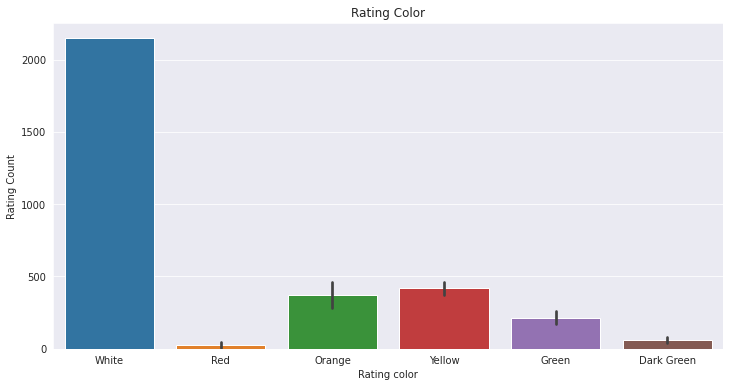

In [12]:
plt.figure(figsize=(12,6))
# plt.xticks(rotation=75)
plt.title('Rating Color')
sns.barplot(x=df3['Rating color'], y=df3['Rating Count']);

Most of the restaurants are non rated so reason could be they are not exposed to online rating system or actually not that popular 

Countries having maximum white rating or non rated restaurants

In [13]:
no_rating=df2[df2["Rating color"]=="White"].groupby("Country").size().reset_index().rename(columns={0:"Rating count"})
no_rating

,Country,Rating count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


**We shift our EDA to INDIA** by creating a new dataframe named res_india(restaurants in India)

In [14]:
res_india=df2[df2['Country']=="India"]
res_india.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,No,3,3.9,Yellow,Good,140,India
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,No,2,3.5,Yellow,Good,71,India


**City wise analysis**

In [15]:
res_india.City.value_counts()

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Lucknow           21
Bhubaneshwar      21
Amritsar          21
Pune              20
Puducherry        20
Patna             20
Ludhiana          20
Ranchi            20
Surat             20
Vadodara          20
Nashik            20
Nagpur            20
Mysore            20
Mumbai            20
Varanasi          20
Mangalore         20
Agra              20
Kochi             20
Kolkata           20
Dehradun          20
Allahabad         20
Aurangabad        20
Bangalore         20
Bhopal            20
Chennai           20
Coimbatore        20
Goa               20
Indore            20
Jaipur            20
Kanpur            20
Vizag             20
Chandigarh        18
Hyderabad         18
Secunderabad       2
Panchkula          1
Mohali             1
Name: City, dtype: int64

so from this we can see that max of restaurants in our dataset are from Delhi , Gurgoan and Noida so we can shift our analysis to these regions only for more better answers to buisness questions 

**MAX RESTAURANTS Locality in New Delhi** which will give us the idea of requirement of number of riders(food delivery persons) required in which locality is more

Text(0.5, 1.0, 'Restaurants Listing in New Delhi')

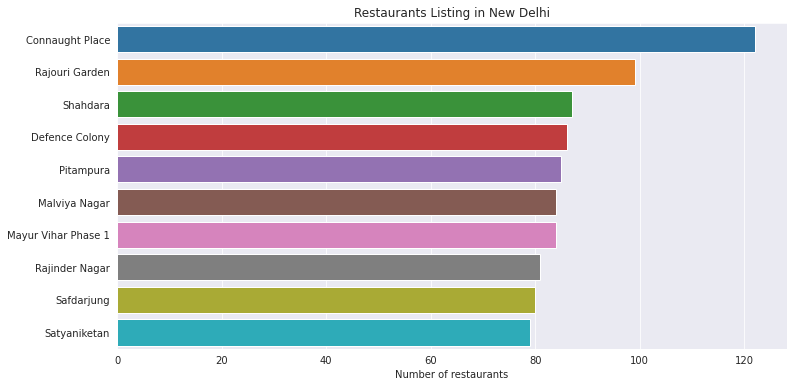

In [16]:
delhi=df2[(df2.City=="New Delhi")]
plt.figure(figsize=(12,6))
sns.barplot(x=delhi.Locality.value_counts().head(10),y=delhi.Locality.value_counts().head(10).index)

plt.ylabel(None)
plt.xlabel("Number of restaurants")
plt.title("Restaurants Listing in New Delhi")

Now that we know max of restaurants are there in Caunaght place so we can see which restaurants are more favourable to public by analysis on reviews given by public

In [17]:
cp=delhi[(delhi.Locality.isin(['Connaught Place'])) & (delhi["Rating text"].isin(['Excellent','Very Good']))]
cp.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
3012,18418277,MOB Brewpub,1,New Delhi,"M 44, Outer Circle, Connaught Place, New Delhi",Connaught Place,"Connaught Place, New Delhi",77.222642,28.633276,"Continental, Italian, Asian, Indian",...,No,No,No,No,3,4.7,Dark Green,Excellent,52,India
3013,310143,Naturals Ice Cream,1,New Delhi,"L-8, Outer Circle, Connaught Place, New Delhi",Connaught Place,"Connaught Place, New Delhi",77.222148,28.634348,Ice Cream,...,No,Yes,No,No,1,4.9,Dark Green,Excellent,2620,India


**So in this way we can do EDA on various other questions like cuisines they offer and what type of cuisine a particular locality prefer**


**I'm still a newbie and would love to gain something from your feedback so please comment and do upvote if you like the basic EDA performed on this dataset**

# Thank you !!!